<a href="https://colab.research.google.com/github/aounallahsara/ML_models/blob/main/ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# connect to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(columns='id', axis=1)

In [ ]:
df = df.drop(columns='Unnamed: 32', axis=1)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].unique()

array([1, 0])

In [ ]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


correlation

In [ ]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
corr = df.corr().abs()
high_corr = corr.where((corr > 0.9) & (corr < 1))
high_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,NaN,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,...,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,NaN,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,...,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,NaN,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,...,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910155,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr_target = df.corr()['diagnosis'].sort_values(ascending=False)

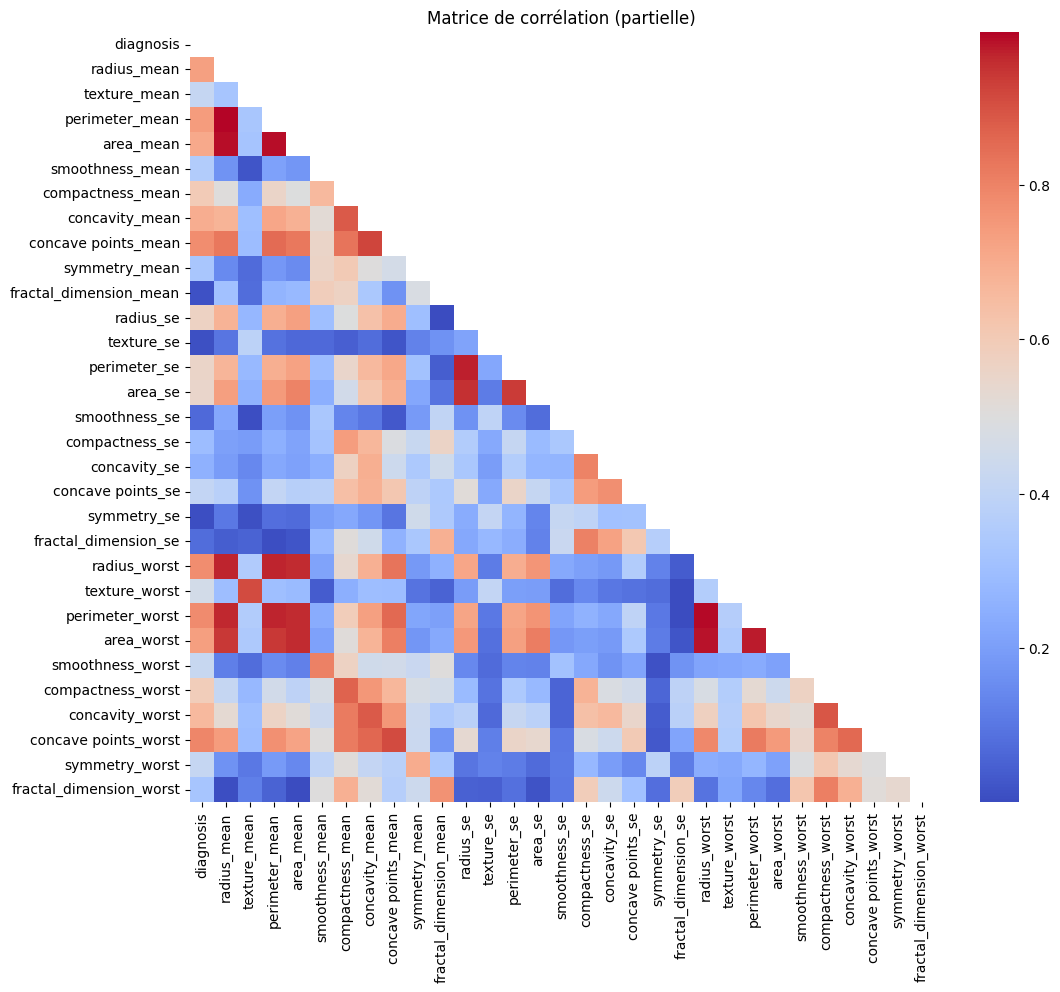

In [ ]:
import seaborn as sns

# Masquer la moitié supérieure
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation (partielle)")
plt.show()

In [ ]:
# standardisation
from sklearn.preprocessing import StandardScaler

x = df.drop(columns='diagnosis', axis=1)
y = df['diagnosis']

z_scaler = StandardScaler()
x_scaled = z_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# linear kernel
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(x_train, y_train)
y_pred_L = linear_svm.predict(x_test)

In [ ]:
Lin_accuracy = accuracy_score(y_test, y_pred_L)
print("Linear kernel Accuracy:", Lin_accuracy)

Linear kernel Accuracy: 0.9649122807017544


In [ ]:
# polynomiale kernel
poly_svm = SVC(kernel='poly', degree=3, C=1.0)
poly_svm.fit(x_train, y_train)
y_pred_P = poly_svm.predict(x_test)

In [ ]:
poly_accuracy = accuracy_score(y_test, y_pred_P)
print("Polynomial kernel Accuracy:", poly_accuracy)

Polynomial kernel Accuracy: 0.8859649122807017


In [ ]:
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=0.1)
rbf_svm.fit(x_train, y_train)
y_pred_rbf = rbf_svm.predict(x_test)

In [ ]:
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print("RBF kernel Accuracy:", rbf_accuracy)

RBF kernel Accuracy: 0.9298245614035088


In [ ]:
# gridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score :", grid.best_score_)

Meilleurs paramètres : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Meilleur score : 0.9758241758241759


In [ ]:
# randomized search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

random = RandomizedSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
random.fit(x_train, y_train)

print("Meilleurs paramètres :", random.best_params_)
print("Meilleur score :", random.best_score_)

Meilleurs paramètres : {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Meilleur score : 0.9736263736263737


In [ ]:
grid_rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
grid_rbf_svm.fit(x_train, y_train)
y_pred_gs_rbf = grid_rbf_svm.predict(x_test)

In [ ]:
gs_rbf_accuracy = accuracy_score(y_test, y_pred_gs_rbf)
print("RBF kernel Accuracy:", gs_rbf_accuracy)

RBF kernel Accuracy: 0.9736842105263158


In [ ]:
# Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier

SGD_svm = SGDClassifier(
    loss='hinge',
    penalty='l2',
    learning_rate='optimal',
    max_iter=1000,
    tol=1e-3,
    shuffle=True,
    random_state=42
)
SGD_svm.fit(x_train, y_train)
y_pred_SGD = SGD_svm.predict(x_test)

In [ ]:
accuracy_SGD = accuracy_score(y_test, y_pred_SGD)
print("SGD Accuracy:", accuracy_SGD)

SGD Accuracy: 0.9736842105263158


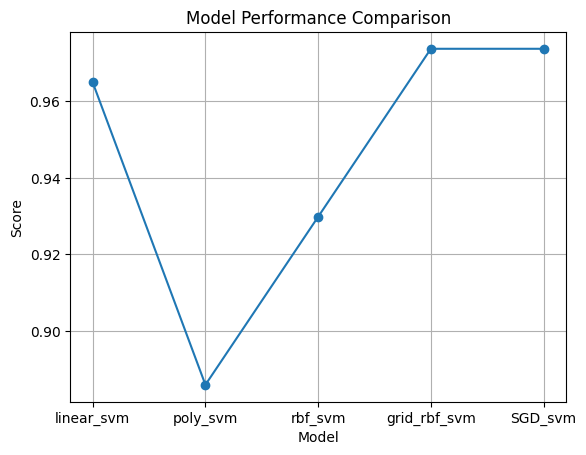

In [ ]:
plt.plot(['linear_svm', 'poly_svm', 'rbf_svm', 'grid_rbf_svm' ,'SGD_svm'],[Lin_accuracy, poly_accuracy, rbf_accuracy, gs_rbf_accuracy,  accuracy_SGD], marker='o')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.grid(True)
plt.show()

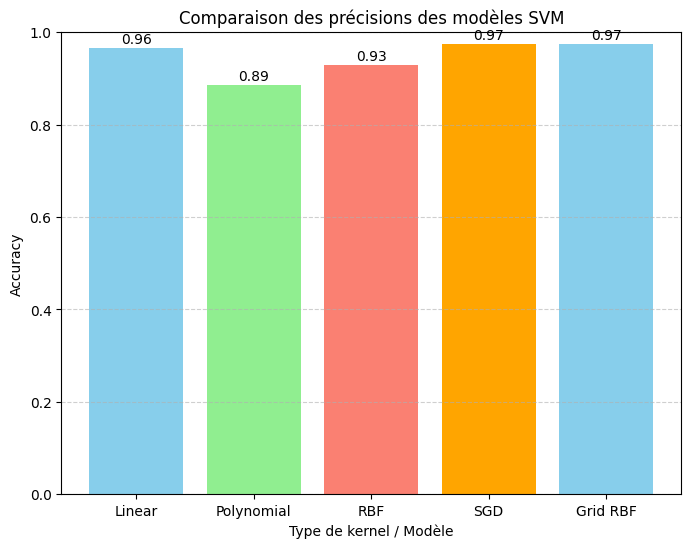

In [ ]:
import matplotlib.pyplot as plt

# Dictionnaire des résultats
accuracies = {
    "Linear": Lin_accuracy,
    "Polynomial": poly_accuracy,
    "RBF": rbf_accuracy,
    "SGD": accuracy_SGD,
    "Grid RBF": gs_rbf_accuracy
}

# Création du bar chart
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title("Comparaison des précisions des modèles SVM")
plt.xlabel("Type de kernel / Modèle")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Afficher les valeurs au-dessus des barres
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)

plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



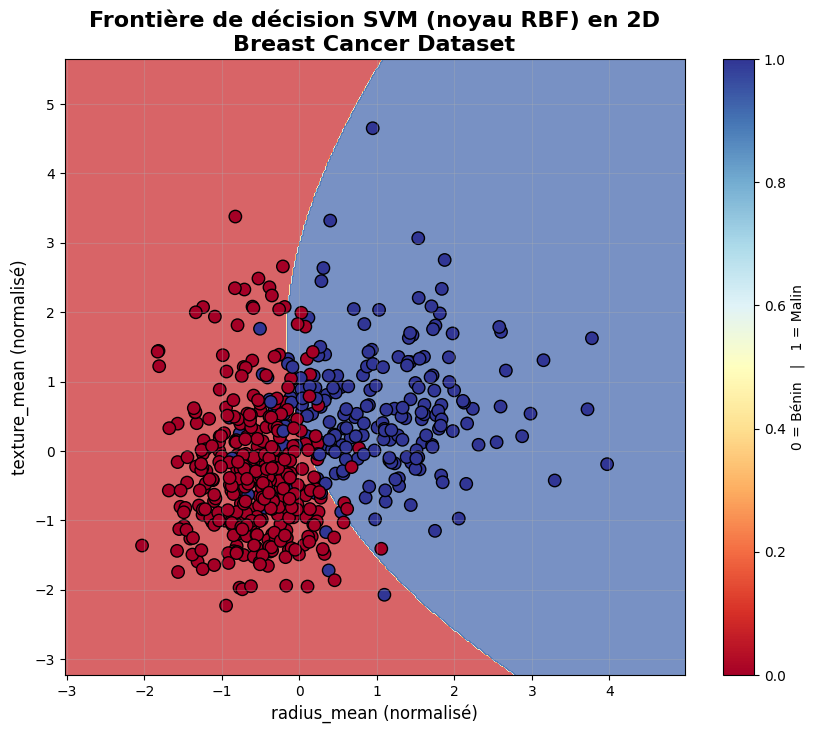

In [ ]:
# ====================== 5. FRONTIÈRE DE DÉCISION ======================
def plot_decision_boundary(X_plot_data, y_plot_data, model_2d, feature_names, title):
    h = 0.02  # pas du maillage

    # Ensure X_plot_data is a NumPy array for consistent indexing
    if isinstance(X_plot_data, pd.DataFrame):
        X_plot_data = X_plot_data.values

    # Check if X_plot_data has at least 2 features
    if X_plot_data.shape[1] < 2:
        raise ValueError("X_plot_data must contain at least two features for a 2D decision boundary plot.")

    x_min, x_max = X_plot_data[:, 0].min() - 1, X_plot_data[:, 0].max() + 1
    y_min, y_max = X_plot_data[:, 1].min() - 1, X_plot_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict using the 2D model
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.7)

    # Points réels
    plt.scatter(X_plot_data[:, 0], X_plot_data[:, 1], c=y_plot_data, cmap=plt.cm.RdYlBu, edgecolors='k', s=80)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(f"{feature_names[0]} (normalisé)", fontsize=12)
    plt.ylabel(f"{feature_names[1]} (normalisé)", fontsize=12)
    plt.colorbar(label='0 = Bénin   |   1 = Malin')
    plt.grid(True, alpha=0.3)
    plt.show()

# ====================== 6. AFFICHAGE ======================
# Select the two features for the 2D plot.
# Let's choose 'radius_mean' and 'texture_mean' as these are commonly used for 2D visualization
# and the original plot's axis labels suggest these.
features_for_2d_plot = ['radius_mean', 'texture_mean']
X_2d_data = x_scaled[features_for_2d_plot]

# Train a new RBF SVM model specifically on these two features
# Use the best parameters found by GridSearchCV for consistency.
rbf_svm_2d_model = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
rbf_svm_2d_model.fit(X_2d_data, y)

# Call the plotting function with the 2D data, the 2D trained model, and feature names
plot_decision_boundary(X_2d_data, y, rbf_svm_2d_model, features_for_2d_plot, "Frontière de décision SVM (noyau RBF) en 2D\nBreast Cancer Dataset")

In [ ]:
import plotly.graph_objects as go

def plot_3d_decision_boundary(X, y, model, features):
    h = 0.1


    if isinstance(X, pd.DataFrame):
        X = X.values

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h),
                             np.arange(z_min, z_max, h))

    grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)


    fig = go.Figure()


    fig.add_trace(go.Surface(
        x=xx[::5, ::5, ::5], y=yy[::5, ::5, ::5], z=zz[::5, ::5, ::5],
        surfacecolor=Z[::5, ::5, ::5],
        colorscale='RdYlBu',
        opacity=0.6,
        showscale=False,
        name='Frontière'
    ))


    fig.add_trace(go.Scatter3d(
        x=X[y==0, 0], y=X[y==0, 1], z=X[y==0, 2],
        mode='markers', marker=dict(size=6, color='blue', symbol='circle'),
        name='Bénin'
    ))

    fig.add_trace(go.Scatter3d(
        x=X[y==1, 0], y=X[y==1, 1], z=X[y==1, 2],
        mode='markers', marker=dict(size=6, color='red', symbol='x'),
        name='Malin'
    ))

    # Mise en forme
    fig.update_layout(
        title="Frontière de décision SVM (RBF) en 3D<br>Breast Cancer Dataset",
        scene=dict(
            xaxis_title=features[0],
            yaxis_title=features[1],
            zaxis_title=features[2]
        ),
        width=900, height=700
    )

    fig.show()


top_3_features = corr_target.index[1:4].tolist()
X_3d = x_scaled[top_3_features]


rbf_svm_3d = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
rbf_svm_3d.fit(X_3d.values, y)

plot_3d_decision_boundary(X_3d, y, rbf_svm_3d, top_3_features)